# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Описание данных

- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)

- balcony — число балконов

- ceiling_height — высота потолков (м)

- cityCenters_nearest — расстояние до центра города (м)

- days_exposition — сколько дней было размещено объявление (от публикации до снятия)

- first_day_exposition — дата публикации

- floor — этаж

- floors_total — всего этажей в доме

- is_apartment — апартаменты (булев тип)

- kitchen_area — площадь кухни в квадратных метрах (м²)

- last_price — цена на момент снятия с публикации

- living_area — жилая площадь в квадратных метрах(м²)

- locality_name — название населённого пункта

- open_plan — свободная планировка (булев тип)

- parks_around3000 — число парков в радиусе 3 км

- parks_nearest — расстояние до ближайшего парка (м)

- ponds_around3000 — число водоёмов в радиусе 3 км

- ponds_nearest — расстояние до ближайшего водоёма (м)

- rooms — число комнат

- studio — квартира-студия (булев тип)

- total_area — площадь квартиры в квадратных метрах (м²)

- total_images — число фотографий квартиры в объявлении

### Шаг 1. Откройте файл с данными и изучите общую информацию. 

Импорт библиотек

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# чтение файла и сохранение в переменную data
data = pd.read_csv('/datasets/real_estate_data.csv', delimiter='\t')

Выведим первые 10 строк таблицы data

In [3]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Получим общую информацию по таблице *data*

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

Выведим числовое описание

In [5]:
data.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
total_images,23699.0,9.86,5.68,0.0,6.00,9.00,14.0,50.0
last_price,23699.0,6541548.77,10887013.27,12190.0,3400000.00,4650000.00,6800000.0,763000000.0
total_area,23699.0,60.35,35.65,12.0,40.00,52.00,69.9,900.0
rooms,23699.0,2.07,1.08,0.0,1.00,2.00,3.0,19.0
ceiling_height,14504.0,2.77,1.26,1.0,2.52,2.65,2.8,100.0
floors_total,23613.0,10.67,6.60,1.0,5.00,9.00,16.0,60.0
living_area,21796.0,34.46,22.03,2.0,18.60,30.00,42.3,409.7
floor,23699.0,5.89,4.89,1.0,2.00,4.00,8.0,33.0
kitchen_area,21421.0,10.57,5.91,1.3,7.00,9.10,12.0,112.0
balcony,12180.0,1.15,1.07,0.0,0.00,1.00,2.0,5.0


### Вывод

В таблице хранятся 23699 объявлений о продажи жилья, на каждое жилье есть 22 параметра к сожелению не все заполнены, самое большую долю пропусков в 88% столбец *is_apartment*  

### Шаг 2. Предобработка данных

#### Обработка пропусков

Заполним пропущенные значения нулем в столбце *balcony* раз хозяин не указал кол-во

In [6]:
data['balcony'] = data['balcony'].fillna(0)

Давайте взгляним на распределения *ceiling_height*

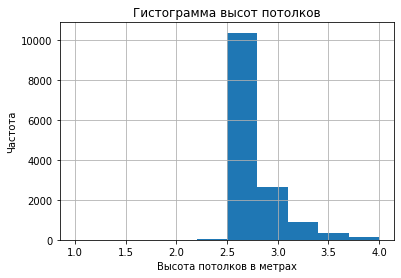

In [7]:
data['ceiling_height'].hist(range=(1,4));
plt.title('Гистограмма высот потолков')
plt.xlabel('Высота потолков в метрах')
plt.ylabel('Частота');

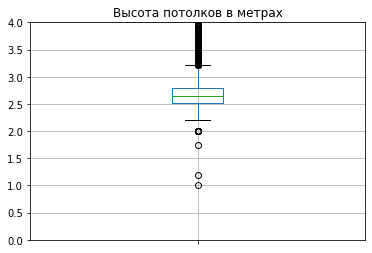

In [8]:
plt.ylim(0, 4)
data[['ceiling_height']].boxplot();
plt.title('Высота потолков в метрах');
plt.xticks([1], ['']);

Высота потолков от 2,5 метров до 2,8 имеются выбросы, в нижней части 4 выброса меньше 1,5 межквантельного размаха, и сверху выбросов много жирная черная линия, давайте заполним пропуски медианным значением. 

In [9]:
data['ceiling_height_transformed'] = data['ceiling_height'].fillna(data['ceiling_height'].median())

Заполним  пропуски *kitchen_area* и *living_area* при помощи *total_area*

Для начала разабьем на  4 квартильные группы *total_area* Q1-Q4

In [10]:
data['total_area_group'] = pd.qcut(data['total_area'], q=4, labels=['Q1', 'Q2','Q3','Q4'])

In [11]:
data.groupby(['total_area_group'])['living_area', 'kitchen_area'].median()

,living_area,kitchen_area
total_area_group,,
Q1,17.2,8.25
Q2,27.4,8.00
Q3,35.5,9.00
Q4,51.3,13.00


Заполним этими значениями пропущенные значения в соответсвующих столбцах

In [12]:
data['kitchen_area_transformed'] = data.groupby(['total_area_group'])['kitchen_area'].apply(lambda x : x.fillna(x.median()))
data['living_area_transformed'] =  data.groupby(['total_area_group'])['living_area'].apply(lambda x : x.fillna(x.median()))

Пропуски в столбце *cityCenters_nearest* заполним медианной по столбцу *locality_name*

In [13]:
data.pivot_table(index='locality_name', values='cityCenters_nearest', aggfunc=['median']).head()

,median
,cityCenters_nearest
locality_name,
Зеленогорск,53381.0
Колпино,32018.0
Красное Село,29140.5
Кронштадт,49575.0
Ломоносов,51677.0


In [14]:
data['cityCenters_nearest_transformed'] = data.groupby(['locality_name'])['cityCenters_nearest'].apply(lambda x : x.fillna(x.median()))

Заполним столбец *floors_total* значением *floor* предположим что владелец решил не дублировать информацию

In [15]:
data['floors_total_transformed'] = data['floors_total'].fillna(data['floor'])

#### Замена типа данных

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 28 columns):
total_images                       23699 non-null int64
last_price                         23699 non-null float64
total_area                         23699 non-null float64
first_day_exposition               23699 non-null object
rooms                              23699 non-null int64
ceiling_height                     14504 non-null float64
floors_total                       23613 non-null float64
living_area                        21796 non-null float64
floor                              23699 non-null int64
is_apartment                       2775 non-null object
studio                             23699 non-null bool
open_plan                          23699 non-null bool
kitchen_area                       21421 non-null float64
balcony                            23699 non-null float64
locality_name                      23650 non-null object
airports_nearest                   18

In [17]:
data[['last_price', 'floors_total_transformed', 'balcony','rooms']] = data[['last_price', 'floors_total_transformed', 'balcony','rooms']].astype('int')

In [18]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 28 columns):
total_images                       23699 non-null int64
last_price                         23699 non-null int64
total_area                         23699 non-null float64
first_day_exposition               23699 non-null datetime64[ns]
rooms                              23699 non-null int64
ceiling_height                     14504 non-null float64
floors_total                       23613 non-null float64
living_area                        21796 non-null float64
floor                              23699 non-null int64
is_apartment                       2775 non-null object
studio                             23699 non-null bool
open_plan                          23699 non-null bool
kitchen_area                       21421 non-null float64
balcony                            23699 non-null int64
locality_name                      23650 non-null object
airports_nearest                 

Поменяли формат значения на целочисленное в столбцах *last_price, floors_total_transformed, balcony, rooms* логичнее хранить в таком формате данных, трудно представить 1,33 балкона , или 1,7 комнат, 9 и 3/4 этаж

Осталось еще большое кол-во столбцов где пропущены значения, *is_apartment* сложно придумать логическое заполнение для этого столбца, по поводу столбцов с расстоянием до аэропорта, парков и водоемов не во всех селениях они есть, заполнить 0 некорректно
возможно при выгрузке из базы или соединения таблиц произошла ошибка.

### Шаг 3. Посчитайте и добавьте в таблицу

Добавляем цену за квадраный метр

In [20]:
data['price_m2'] = (data['last_price'] / data['total_area']).astype('int')

день недели, месяц и год публикации объявления

In [21]:
data['weekday'] = data['first_day_exposition'].dt.day_name()
data['month'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year

этаж квартиры; варианты — первый, последний, другой, для этого создадим функцию

In [22]:
def floors_type(row):
    floor = row['floor']
    floors_total_transformed = row['floors_total_transformed']
    if floor == floors_total_transformed:
        return 'последний'
    if floor == 1:
        return 'первый этаж'
    else:
        return 'другой'
    

In [23]:
data['floors_type'] = data.apply(floors_type, axis=1)

соотношение жилой и общей площади

In [24]:
data['livng_room_to_total_area_ratio'] = (data['living_area_transformed'] / data['total_area']).round(2)

соотношение кухни к общей площади

In [25]:
data['kitchen_room_to_total_area_ratio'] = (data['kitchen_area_transformed'] / data['total_area']).round(2)

### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

Взгляним на параметры площадь, цена, число комнат, высота потолков

In [26]:
data[['total_area', 'last_price', 'rooms', 'ceiling_height_transformed']].describe().round()

,total_area,last_price,rooms,ceiling_height_transformed
count,23699.0,23699.0,23699.0,23699.0
mean,60.0,6541549.0,2.0,3.0
std,36.0,10887013.0,1.0,1.0
min,12.0,12190.0,0.0,1.0
25%,40.0,3400000.0,1.0,3.0
50%,52.0,4650000.0,2.0,3.0
75%,70.0,6800000.0,3.0,3.0
max,900.0,763000000.0,19.0,100.0


Что мы видим очень выбиваются максимальные значения общей площади, цены, комнат и потолков.Таких значений небольшое количество потому что медиана и средние значение не так разнятся.

Напишем функцию hist_plot которая будет строить гистограммы для параметров площадь, цена, число комнат, высота потолков. При этом уберем выбросы 1,5 межквартильного размаха

In [27]:
def hist_plot(data):
    title_dict = {'total_area': 'Площадь квартиры', 'last_price': 'Последняя цена', 'rooms': 'Число комнат', 'ceiling_height_transformed': 'Высота потолков'}
    for key ,values in title_dict.items():
        plt.title(values)
        desc = data[key].describe()
        q1 = desc[4]
        q3 = desc[6]
        iqr = q3 - q1
        plt.hist(data[key],bins=100, range=((q1 - 1.5 * iqr),(q3 + 1.5 * iqr)))    
        plt.ylabel('Частота')
        plt.show()


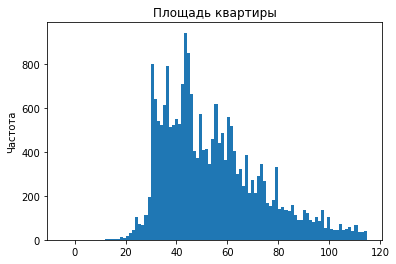

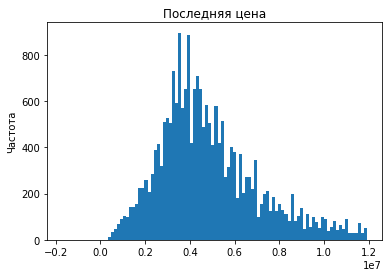

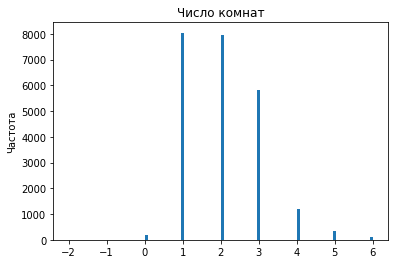

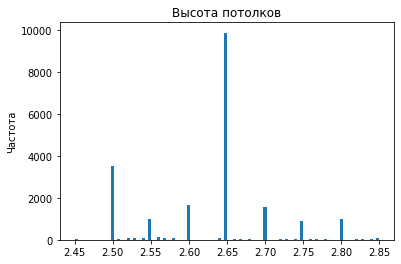

In [28]:
hist_plot(data)

Площадь квартир в основном от 30 м2 до 80 м2 большей квадратурой встречаются реже, цены большенства квартир от 3 млн до 7 млн,
16 тыс квартир 1-2 комнатные это больше половины всех квартир,распределение высоты потолков от 2,5 до 2,85 м

Расмотрим параметр время продажи квартиры

In [29]:
data['days_exposition'].describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

Медиана расположилась в отметке 95 дней, а среднее значение в 180 дней практически в два раза больше, меньше 232 дней находятся 75% данных

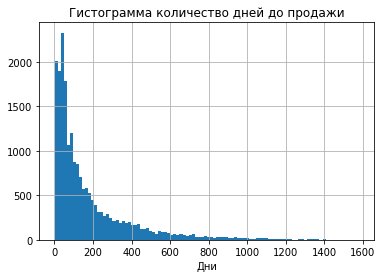

In [30]:
data.hist('days_exposition', bins=100);
plt.title('Гистограмма количество дней до продажи')
plt.xlabel('Дни');

Большая часть значений лежит до 232 дней, необычно долго можно считать от 730(2 года) дней ,быстрой продажей можно считать до 70 дней   

In [31]:
filtered_data = data.query('total_area <= 120 and rooms <= 6 and ceiling_height_transformed >=2 and ceiling_height_transformed <= 3 and days_exposition <= 730 and last_price <=12000000')
filtered_data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,living_area_transformed,cityCenters_nearest_transformed,floors_total_transformed,price_m2,weekday,month,year,floors_type,livng_room_to_total_area_ratio,kitchen_room_to_total_area_ratio
1,7,3350000,40.40,2018-12-04,1,NaN,11.0,18.60,1,NaN,...,18.60,18603.0,11,82920,Tuesday,12,2018,первый этаж,0.46,0.27
2,10,5196000,56.00,2015-08-20,2,NaN,5.0,34.30,4,NaN,...,34.30,13933.0,5,92785,Thursday,8,2015,другой,0.61,0.15
5,10,2890000,30.40,2018-09-10,1,NaN,12.0,14.40,5,NaN,...,14.40,NaN,12,95065,Monday,9,2018,другой,0.47,0.30
6,6,3700000,37.30,2017-11-02,1,NaN,26.0,10.60,6,NaN,...,10.60,19143.0,26,99195,Thursday,11,2017,другой,0.28,0.39
8,20,2900000,33.16,2018-05-23,1,NaN,27.0,15.43,26,NaN,...,15.43,NaN,27,87454,Wednesday,5,2018,другой,0.47,0.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23691,11,9470000,72.90,2016-10-13,2,2.75,25.0,40.30,7,NaN,...,40.30,4489.0,25,129903,Thursday,10,2016,другой,0.55,0.15
23692,2,1350000,30.00,2017-07-07,1,NaN,5.0,17.50,4,NaN,...,17.50,NaN,5,45000,Friday,7,2017,другой,0.58,0.20
23693,9,4600000,62.40,2016-08-05,3,2.60,9.0,40.00,8,NaN,...,40.00,34104.0,9,73717,Friday,8,2016,другой,0.64,0.13
23695,14,3100000,59.00,2018-01-15,3,NaN,5.0,38.00,4,NaN,...,38.00,NaN,5,52542,Monday,1,2018,другой,0.64,0.14


### Вывод

Обнаружили выбивающие значения в параметрах общей площади(900м2), цены(763млн), комнат(19) и потолков(100м), отфильтровали по верхнему усу ящика с усами, поставили верхнюю границу в 730 дня для параметра продажи квартиры.

Вызовим корреляцию Пирсона что бы посмотреть линейную зависимость для параметров: общая площадь,число комнат,удаленность от центра города к цене квартиры.

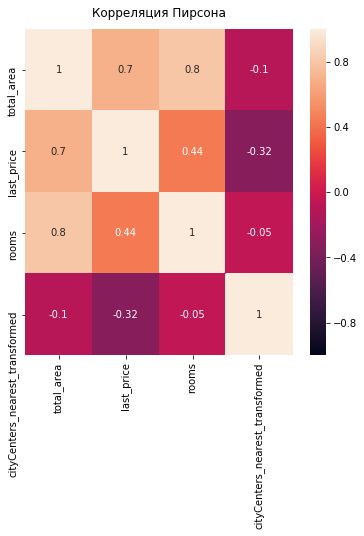

In [32]:
corr = filtered_data[['total_area','last_price','rooms', 'cityCenters_nearest_transformed']].corr().round(2)
plt.figure(figsize=(6, 6))
heatmap = sns.heatmap(corr, vmin=-1, vmax=1, annot=True)
heatmap.set_title('Корреляция Пирсона', fontdict={'fontsize':12}, pad=12);

Сильная положительная корреляция между общей площадью и ценой, чуть слабее к числу комнат и ценой, и есть слабая отрицательная корреляция между удаленностью от центра. Достаточно логично, чем больше квадратура квартиры тем она дороже, чем дальше она от центра тем дешевле.

Напишем функцию для отрисовки boxplot зависимость цены от факторов как типа этажа,даты размещения.

In [33]:
def boxplot_plot(data):
    title_dict = {'floors_type':'этажа','weekday': 'дня недели', 'month': 'месяца', 'year': 'года'}
    for key ,values in title_dict.items():
        plt.title('Зависимость стоимости от '+values)
        sns.boxplot(x= key, y='last_price', data=data)
        plt.ylabel('Цена')
        plt.show()

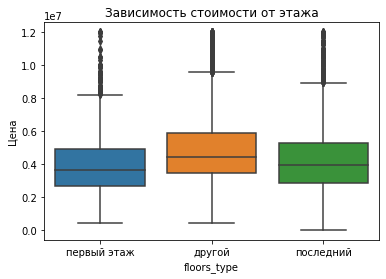

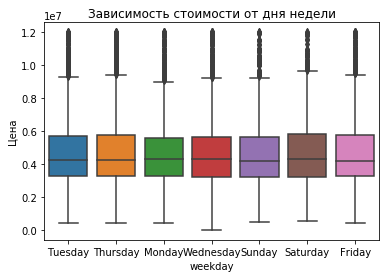

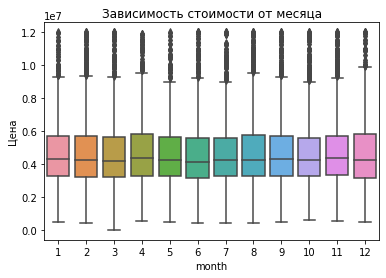

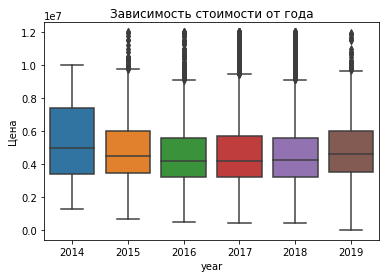

In [34]:
boxplot_plot(filtered_data)

Дешевле всех оказались квартиры на первом этаже, следом расположились квартиры на последнем этаже, от дня размещения и месяца цены не особо отличаются, а вот если взглянуть на год размещения то видно что в 2014 году цены были от 4 млн до 7,5 млн

Выявим топ 10 населенных пунктов по объявлением, и рассчитаем среднюю стоимость квадратного метра для них.

In [35]:
top10 = filtered_data['locality_name'].value_counts().head(10)
mean_price = filtered_data.pivot_table(index='locality_name', values='price_m2', aggfunc=['mean', 'count'])
mean_price.columns = ['mean', 'count']
mean_price.query('locality_name in @top10.index').sort_values('count', ascending=False)

,mean,count
locality_name,,
Санкт-Петербург,104173.999821,11170
посёлок Мурино,85888.623742,497
посёлок Шушары,77922.524051,395
Всеволожск,66928.656250,320
посёлок Парголово,89489.826531,294
Колпино,74654.910653,291
деревня Кудрово,92546.663082,279
Пушкин,99039.400749,267
Гатчина,68130.469636,247


Самая высокая средняя цена за квадратный метр в  Санкт-Петербурге 111096, а самая низкая Выборге с средней ценой 56995

Изучим предложения Санкт-Петербурга

In [36]:
spb = filtered_data.query('locality_name == "Санкт-Петербург"')
spb.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,living_area_transformed,cityCenters_nearest_transformed,floors_total_transformed,price_m2,weekday,month,year,floors_type,livng_room_to_total_area_ratio,kitchen_room_to_total_area_ratio
2,10,5196000,56.0,2015-08-20,2,NaN,5.0,34.3,4,NaN,...,34.3,13933.0,5,92785,Thursday,8,2015,другой,0.61,0.15
9,18,5400000,61.0,2017-02-26,3,2.50,9.0,43.6,7,NaN,...,43.6,15008.0,9,88524,Sunday,2,2017,другой,0.71,0.11
10,5,5050000,39.6,2017-11-16,1,2.67,12.0,20.3,3,NaN,...,20.3,13878.0,12,127525,Thursday,11,2017,другой,0.51,0.21
15,16,4650000,39.0,2017-11-18,1,NaN,14.0,20.5,5,NaN,...,20.5,14259.0,14,119230,Saturday,11,2017,другой,0.53,0.19
17,6,4180000,36.0,2016-09-09,1,NaN,17.0,16.5,7,NaN,...,16.5,14616.0,17,116111,Friday,9,2016,другой,0.46,0.31


Создадим столбец расстояние от центра в километрах 

In [37]:
spb['centers_km'] = (spb['cityCenters_nearest_transformed'] / 1000).round()

Рассчитаем среднюю стоимость квартиры в Петербурге для каждого километра

In [38]:
stats_spb = spb.pivot_table(index='centers_km', values='last_price').round()
stats_spb = stats_spb.reset_index()

Для определения границы цетральной зоны построим график

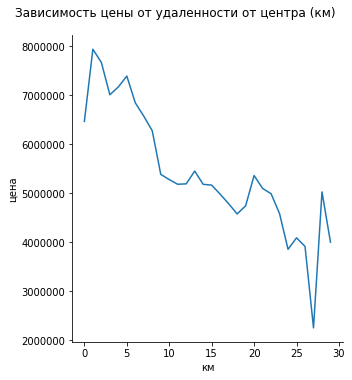

In [39]:
centers = sns.relplot(x="centers_km", y="last_price", kind="line", data=stats_spb)
centers.fig.suptitle('Зависимость цены от удаленности от центра (км)', y=1.05);
centers.set(xlabel='км', ylabel='цена');

Границой центра можно считать 7 км 

Расмотрим центральную зону Петербурга

In [40]:
spb_center = spb.query('centers_km <= 7')
spb_center

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,cityCenters_nearest_transformed,floors_total_transformed,price_m2,weekday,month,year,floors_type,livng_room_to_total_area_ratio,kitchen_room_to_total_area_ratio,centers_km
24,8,6500000,97.2,2015-10-31,2,NaN,3.0,46.5,1,NaN,...,2336.0,3,66872,Saturday,10,2015,первый этаж,0.48,0.20,2.0
61,18,7990000,74.0,2017-08-24,2,NaN,4.0,43.0,4,NaN,...,4288.0,4,107972,Thursday,8,2017,последний,0.58,0.27,4.0
94,3,3500000,29.5,2019-04-26,1,2.50,5.0,15.6,2,NaN,...,7303.0,5,118644,Friday,4,2019,другой,0.53,0.19,7.0
99,32,9600000,90.0,2017-09-26,4,NaN,5.0,67.0,2,NaN,...,2818.0,5,106666,Tuesday,9,2017,другой,0.74,0.09,3.0
111,4,4590000,40.0,2017-05-29,1,NaN,6.0,18.0,1,NaN,...,6175.0,6,114750,Monday,5,2017,первый этаж,0.45,0.25,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23644,7,4990000,62.5,2018-04-26,2,2.70,4.0,32.3,4,NaN,...,4415.0,4,79840,Thursday,4,2018,последний,0.52,0.19,4.0
23665,11,4250000,47.0,2016-05-20,1,NaN,6.0,18.2,1,False,...,4946.0,6,90425,Friday,5,2016,первый этаж,0.39,0.31,5.0
23681,13,5250000,43.0,2018-05-11,2,2.50,5.0,29.0,2,NaN,...,7262.0,5,122093,Friday,5,2018,другой,0.67,0.14,7.0
23690,3,5500000,52.0,2018-07-19,2,NaN,5.0,31.0,2,NaN,...,6263.0,5,105769,Thursday,7,2018,другой,0.60,0.12,6.0


Вызовим функцию hist_plot, что бы посторить гистограммы по параметрам площадь, цена, число комнат, высота потолков.

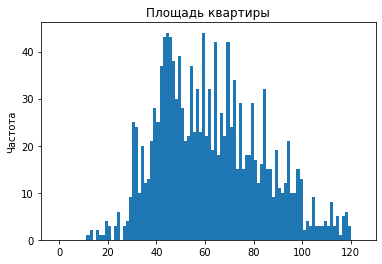

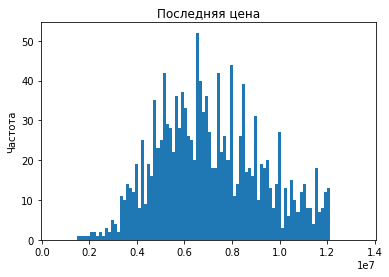

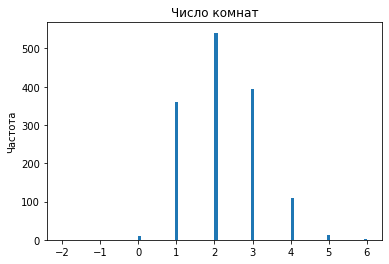

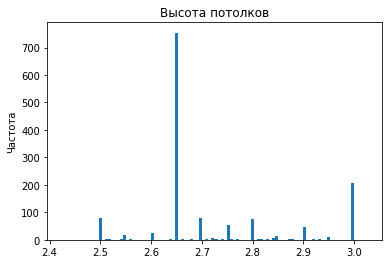

In [41]:
hist_plot(spb_center)

В центре Петрбурга чаще всего 2-3 комнатные квартиры

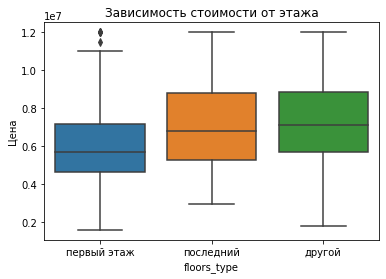

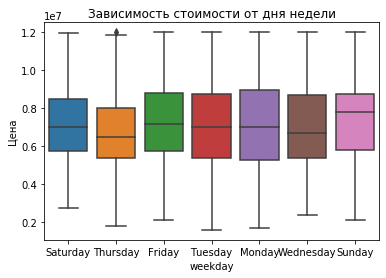

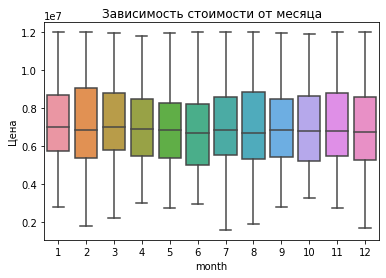

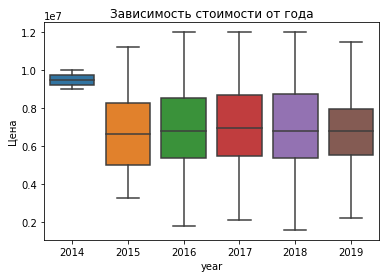

In [42]:
boxplot_plot(spb_center)

### Вывод

В центральной зоне Петербурга площадь квартир  в большинстве от 40 м2 до 80 м2, чаще продают 2 комнатные квартиры, касательно 
цен, ниже цена у квартир расположеные на первом этаже медиана располажилась чуть ниже 6 млн, у других этажей медиана на отметке 7 млн, от даты размещения цены не сильно варьируются.

### Шаг 5. Общий вывод

В целом на цену квартиры влияют общая площадь, удаленность от центра города, на каком этаже расположена квартира.